In [1]:
import pandas as pd
import numpy as np
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
final = pd.read_csv('final_clean_data.csv')

In [13]:
averagefinal = duckdb.sql(""" 
                                SELECT
                                    Year,
                                    ANY_VALUE(recession) AS recession,
                                    ANY_VALUE(election) AS election,
                                    AVG(danceability) AS avg_danceability,
                                    AVG(valence) AS avg_valence,
                                    AVG(US_GDP) AS avg_gdp,
                                    AVG(UnemploymentRate) AS unemployment,
                                    AVG(fedfundrate) AS avg_fedfundrate,
                                    AVG(State_prisons) AS avg_imprisonment,
                                    AVG(fertility) AS avg_fertility, 
                                    AVG(DeathRate) AS avg_deathrate, 
                                    AVG("S&P500") AS avg_stockreturn
                                FROM
                                    final
                                GROUP BY
                                    Year
                                ORDER BY
                                    Year
                                """).df()

averagefinal

,year,recession,election,avg_danceability,avg_valence,avg_gdp,unemployment,avg_fedfundrate,avg_imprisonment,avg_fertility,avg_deathrate,avg_stockreturn
0,1960,1,1,0.522367,0.666010,542.38225,5.541667,3.215833,189735.0,3.6540,1339.2,0.00
1,1961,1,0,0.539533,0.714757,562.20975,6.691667,1.955000,196453.0,3.6200,1298.8,0.27
2,1962,0,0,0.562227,0.701820,603.92150,5.566667,2.708333,194886.0,3.4610,1323.6,-0.09
3,1963,0,0,0.545594,0.714175,637.45150,5.641667,3.178333,194155.0,3.3190,1346.3,0.23
4,1964,0,1,0.531146,0.692634,684.46150,5.158333,3.496667,192627.0,3.1900,1303.8,0.16
5,1965,0,0,0.526300,0.652230,742.29025,4.508333,4.075000,189855.0,2.9130,1306.5,0.12
6,1966,0,0,0.564490,0.689643,813.41375,3.791667,5.111667,180409.0,2.7210,1309.0,-0.10
7,1967,0,0,0.549843,0.656637,859.95625,3.841667,4.220000,175317.0,2.5580,1274.0,0.24
8,1968,0,1,0.562324,0.688987,940.64650,3.558333,5.659167,167571.0,2.4640,1304.5,0.11
9,1969,1,0,0.547902,0.653824,1017.61500,3.491667,8.204167,177513.0,2.4560,1271.8,-0.08


## Hypothesis 2 

In [33]:
input_vars = ["unemployment", "election", "avg_deathrate", "avg_stockreturn", "recession"]
X = averagefinal[input_vars]  
y = averagefinal["avg_danceability"] 


model = LinearRegression().fit(X, y)


for var_name, var_coef in zip(input_vars, model.coef_):
    print(f"{var_name}: {var_coef:.2f}")


print(f"Intercept: {model.intercept_:.2f}")

unemployment: -0.00
election: 0.00
avg_deathrate: -0.00
avg_stockreturn: -0.01
recession: -0.01
Intercept: 0.82


In [15]:
X_train= averagefinal[input_vars]
train_predictions = model.predict(X_train)

In [34]:
residuals = averagefinal["avg_danceability"] - train_predictions
residuals.head()

0   -0.190847
1   -0.167746
2   -0.144904
3   -0.170137
4   -0.172203
Name: avg_danceability, dtype: float64

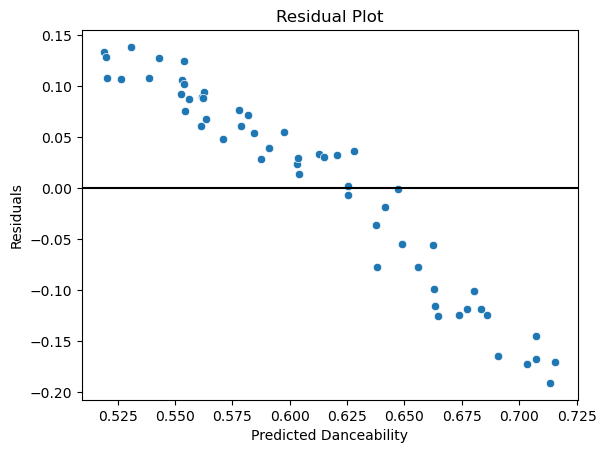

In [35]:
def generate_residual_plot(pred, resid):
    sns.scatterplot(x= pred, y=resid, marker="o")
    plt.axhline(y=0 ,color="black")
    plt.xlabel("Predicted Danceability")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()
    
generate_residual_plot(train_predictions, residuals)

In [36]:
Xmar =  averagefinal[[ "unemployment", "election", "avg_deathrate", \
                      "avg_stockreturn", "recession"]]
ymar = averagefinal[["avg_danceability"]]

Xmar = sm.add_constant(Xmar)
est = sm.OLS(ymar, Xmar).fit()
print('Multivar OLS Regression for Danceability:')
print(est.summary())

Multivar OLS Regression for Danceability:
                            OLS Regression Results                            
Dep. Variable:       avg_danceability   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     32.75
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.17e-14
Time:                        00:42:47   Log-Likelihood:                 136.70
No. Observations:                  56   AIC:                            -261.4
Df Residuals:                      50   BIC:                            -249.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------


# **Sandy's work starts here**

From the heatmap, we can see that collinearity between unemployment and recession is not an issue, as their correlation is only 0.15. Since recessions often bring heightened anxiety, uncertainty, and other negative sentiments, they may amplify the effect of unemployment on people’s music preferences (such as effect on music danceability). This led us to hypothesize that there might be a relationship between unemployment and recession that influences their combined impact on danceability. To test this, we included an interaction term between unemployment and recession in the model, allowing us to explore whether the effect of unemployment on danceability depends on whether the economy is in a recession.

However, the interaction plot showed no crossing lines, indicating that the effect of unemployment on danceability does not significantly differ between recession and non-recession years.

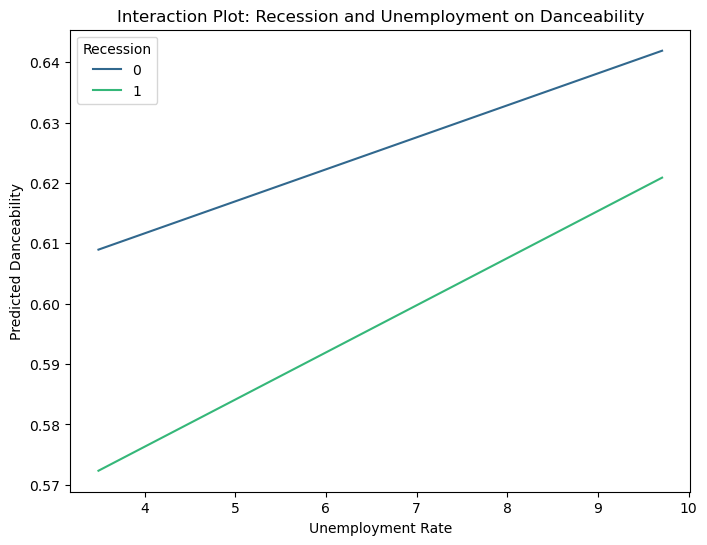

In [30]:
averagefinal['interaction'] = averagefinal['unemployment'] * averagefinal['recession']

# Define independent variables (including interaction) and dependent variable
X = averagefinal[['unemployment', 'recession', 'interaction']]
y = averagefinal['avg_danceability']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
interaction_model = sm.OLS(y, X).fit()

recession_levels = [0, 1]
unemployment_range = np.linspace(averagefinal['unemployment'].min(), averagefinal['unemployment'].max(), 100)

plot_data = pd.DataFrame({
    'unemployment': np.tile(unemployment_range, len(recession_levels)),
    'recession': np.repeat(recession_levels, len(unemployment_range))
})

plot_data['interaction'] = plot_data['unemployment'] * plot_data['recession']
plot_data = sm.add_constant(plot_data)


plot_data['predicted_danceability'] = interaction_model.predict(plot_data)

plt.figure(figsize=(8, 6))

sns.lineplot(
    data=plot_data,
    x='unemployment',  # Use avg_unemployment for the x-axis
    y='predicted_danceability',  # Predicted valence as the y-axis
    hue='recession',  # Recession levels as different lines
    palette="viridis"  # Optional: Adjust color scheme
)

plt.title("Interaction Plot: Recession and Unemployment on Danceability")
plt.xlabel("Unemployment Rate")
plt.ylabel("Predicted Danceability")
plt.legend(title="Recession")
plt.show()

We hypothesize that stock returns may have varying effects on danceability depending on whether or not it is an election year, drawing on domain knowledge.  Elections often bring a lot of political and economic uncertainty, which could change how people’s music preferences respond to stock market changes. For instance, during election years, people might react more strongly to market shifts, while in non-election years, the reactions might be less intense. To explore this idea, we created an interaction plot to show how predicted danceability changes with stock returns in election years compared to non-election years. This helps us see if the effect of stock returns on danceability stays the same or changes between these two scenarios.

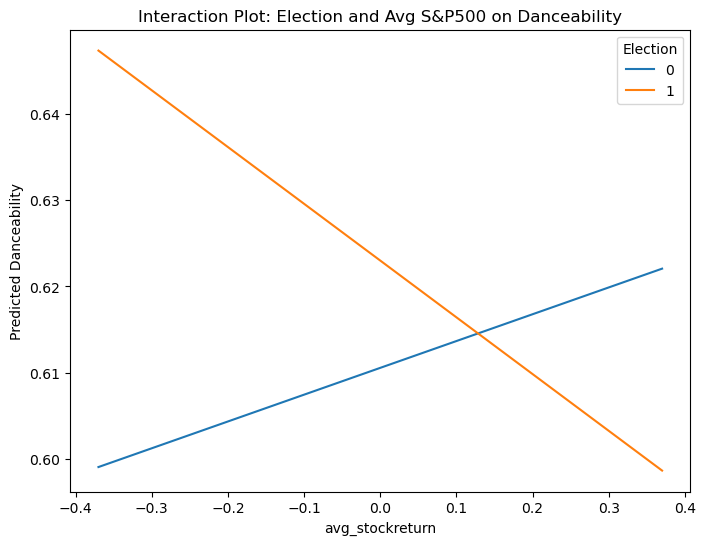

In [31]:
averagefinal['interaction'] = averagefinal["avg_stockreturn"] * averagefinal['election']

# Define independent variables (including interaction) and dependent variable
X = averagefinal[["avg_stockreturn", 'election', 'interaction']]
y = averagefinal['avg_danceability']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
interaction_model = sm.OLS(y, X).fit()

election_levels = [0, 1]
stockreturn_range = np.linspace(averagefinal["avg_stockreturn"].min(), averagefinal["avg_stockreturn"].max(), 100)

plot_data = pd.DataFrame({
    "avg_stockreturn": np.tile(stockreturn_range, len(election_levels)),
    'election': np.repeat(election_levels, len(stockreturn_range))
})

plot_data['interaction'] = plot_data["avg_stockreturn"] * plot_data['election']
plot_data = sm.add_constant(plot_data)


plot_data['predicted_danceability'] = interaction_model.predict(plot_data)

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=plot_data,
    x="avg_stockreturn",
    y='predicted_danceability',
    hue='election'
)
plt.title("Interaction Plot: Election and Avg S&P500 on Danceability")
plt.xlabel("avg_stockreturn")
plt.ylabel("Predicted Danceability")
plt.legend(title="Election")
plt.show()

As shown in the interaction plot above, the lines representing average stock returns during election years and non-election years intersect, suggesting that stock returns may influence public sentiment (danceability) differently depending on whether it is an election year. To test this, we included an interaction term in the OLS multivariable regression model to examine if the effect was statistically significant. Our hypothesis was that a significant interaction term would indicate a different impact of stock returns on danceability during election years. However, the regression output showed a p-value for the interaction term (stock_election) greater than 0.025. This result suggests that the interaction between stock returns and election years does not significantly influence danceability. Therefore, the stock_election term is not necessary and should be excluded from the final model.

In [37]:
averagefinal['stock_election'] = averagefinal['avg_stockreturn'] * averagefinal['election']

Xmar = averagefinal[['unemployment', 'recession', 'avg_deathrate', 'avg_stockreturn', 'election','stock_election' ]]


ymar = averagefinal['avg_danceability']
Xmar = sm.add_constant(Xmar)

est_interaction = sm.OLS(ymar, Xmar).fit()

print('Multivar OLS Regression for Danceability:')
print(est_interaction.summary())

Multivar OLS Regression for Danceability:
                            OLS Regression Results                            
Dep. Variable:       avg_danceability   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     26.76
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           7.02e-14
Time:                        00:43:28   Log-Likelihood:                 136.71
No. Observations:                  56   AIC:                            -259.4
Df Residuals:                      49   BIC:                            -245.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
